In [93]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
digits = datasets.fetch_openml('mnist_784', version=1)

X = digits.data
y = digits.target

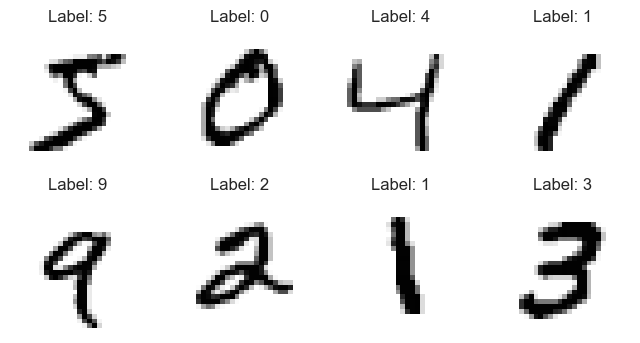

In [95]:
plt.figure(figsize=(8, 4))
for index in range(8):
    plt.subplot(2, 4, index + 1)
    plt.imshow(X.iloc[index].values.reshape(28, 28), cmap=plt.cm.gray_r)
    plt.title(f"Label: {y.iloc[index]}")
    plt.axis('off')
plt.show()

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2005)

In [97]:
model = MLPClassifier(random_state=2005, max_iter=100, hidden_layer_sizes=(128, 64))
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)

In [98]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)
print("Accuracy")
print(model.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1391
           1       0.99      0.99      0.99      1562
           2       0.96      0.98      0.97      1433
           3       0.98      0.96      0.97      1411
           4       0.97      0.98      0.97      1367
           5       0.97      0.97      0.97      1239
           6       0.98      0.99      0.98      1306
           7       0.99      0.98      0.98      1474
           8       0.96      0.98      0.97      1373
           9       0.96      0.96      0.96      1444

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

Confusion Matrix
[[1368    1    5    0    2    1    5    0    6    3]
 [   1 1539    9    1    4    3    0    1    3    1]
 [   5    3 1403    4    3    0    0    7    6    2]
 [   0    1   17 1353    0   17    0    4   16    3]
 [   1    1 

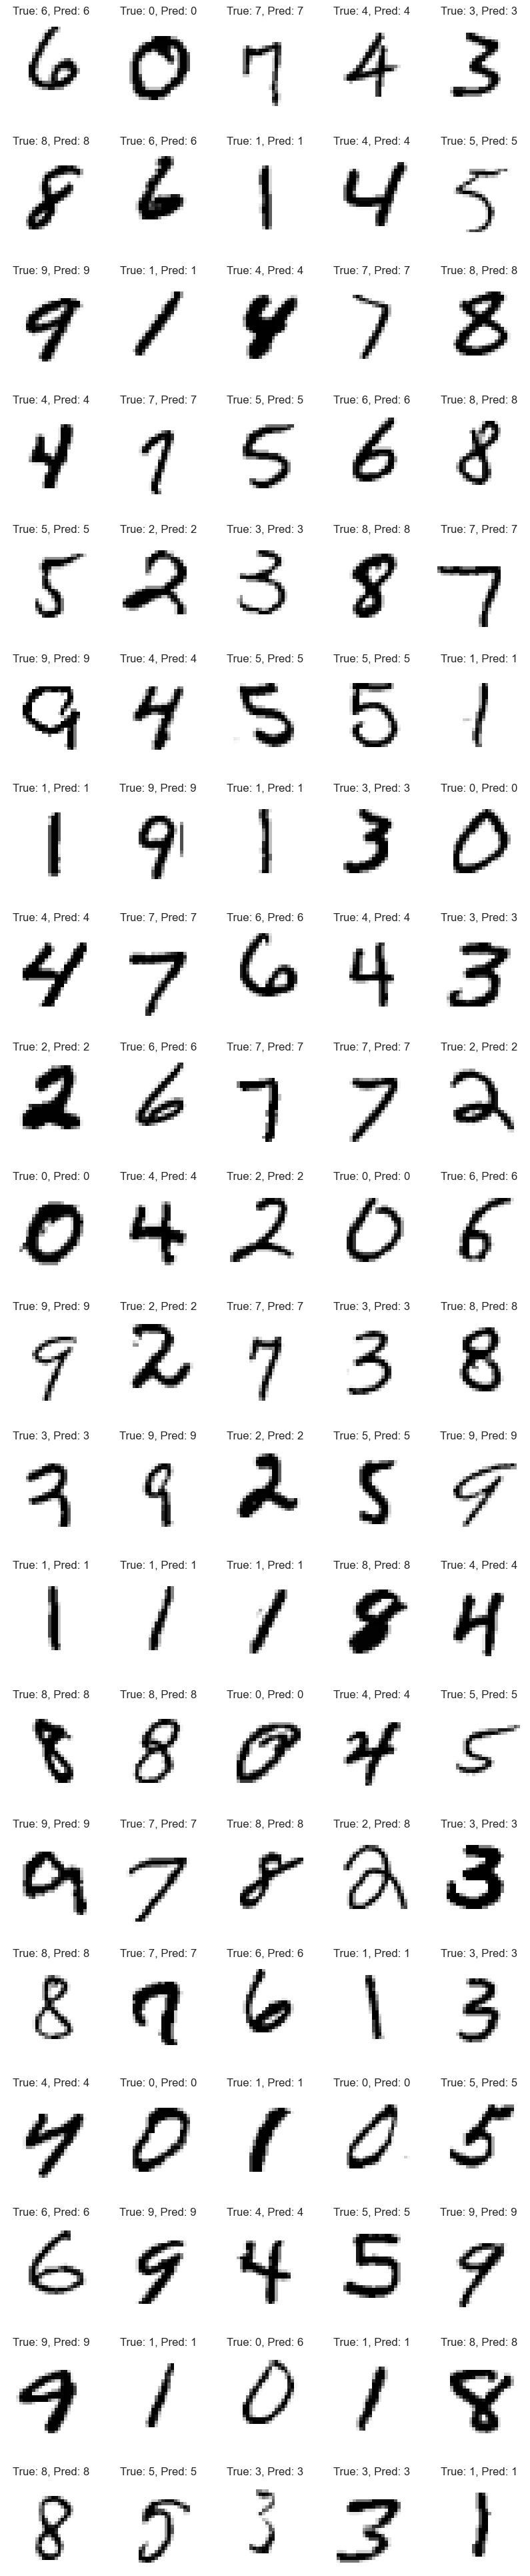

In [108]:
fig, axes = plt.subplots(20, 5, figsize=(10, 50))
for ax, image, true_label, pred_label in zip(axes.ravel(), X_test.values, y_test, y_pred):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r)
    ax.set_title(f"True: {true_label}, Pred: {pred_label}")
    ax.axis('off')
plt.show()